## 201533797_윤병헌_빅데이터_기말고사<a href="#201533797_윤병헌_빅데이터_기말고사" class="anchor-link">¶</a>

------------------------------------------------------------------------

## 파이프라인<a href="#파이프라인" class="anchor-link">¶</a>

[1. 오픈 데이터 해설](#1.오픈-데이터-해설)  
[2. 데이터 보기](#2.-데이터-보기)  
[3. 데이터 클린징](#3.-데이터-클린징)  
[456. 데이터 탐색, 분석 그리고
시각화](#456.-데이터-탐색,-분석-그리고-시각화)  
[7. 차별화 포인트](#7.-차별화-분석-point)  
[8. 빅데이터 수업을 마감하며](#8.-빅데이터-수업을-마감하며)  

## 사용할 <span style="color:#5cb85c">Library</span> Load<a href="#사용할-Library-Load" class="anchor-link">¶</a>

In \[1\]:

    import pandas as pd
    import seaborn as sns
    import matplotlib.pylab as plt
    import numpy as np
    from scipy import stats

    # plot()으로 시각화 시 한글 깨짐을 방지하기 위한 한글 font 설정
    plt.rc('font', family='Malgun Gothic')

------------------------------------------------------------------------

# <span style="color:#0492FE">1.오픈 데이터 해설</span><a href="#1.오픈-데이터-해설" class="anchor-link">¶</a>

#### \[ 오픈 데이터 출처 \]<a href="#%5B-오픈-데이터-출처-%5D" class="anchor-link">¶</a>

대학알리미 <https://www.academyinfo.go.kr/index.do#none> 페이지 내  
공시 데이터 다운로드
<https://www.academyinfo.go.kr/popup/main0810/list.do> 에서 제공하는
데이터를 사용하였습니다

해당 '대학알리미' 사이트에서는  
각각의 카테고리(학생/교육여건/교육연구성과 등), 그에 맞는
공시항목(교육연구성과 - 졸업생 현황 등)을 년도 별로 제공합니다  
저는 여기서 **19년과 20년 사이의 학교별 전공과목 성적 분포 차이 및
부가적으로 찾아낼 수 있는 정보** 에 흥미가 생겨서 이를 사용하게
되었습니다

데이터는 학생 - 성적평가 결과(성적평가 분포) - 전공과목 성적 분포 -
학교별 - 2020,2021 데이터를 사용하였습니다  
참고로 한 가지 짚고 가면 좋은 점은 **2020년도 데이터의 기준연도는
2019년이고, 2021년도 데이터의 기준연도는 2020년입니다**  
또한, 기본적으로 제공되는 파일은 단순한 Excel 파일이며, 이를 CSV
UTF-8(쉼표로 분리)(\*.csv), 다른 확장자로 저장하여 사용하였습니다

## <span style="color:#FA8072">백업 및 불러오기 1</span><a href="#백업-및-불러오기-1" class="anchor-link">¶</a>

In \[2\]:

    file_path='D:/data/data_university_csv/2020년 _대학_2-가-1. 전공과목 성적 분포_학교별자료.csv'
    df = pd.read_csv(file_path, encoding='UTF-8')
    df.to_csv("D:/data/data_university_csv/2020년 _대학_2-가-1. 전공과목 성적 분포_학교별자료_backup.csv")

    file_path='D:/data/data_university_csv/2020년 _대학_2-가-1. 전공과목 성적 분포_학교별자료_backup.csv'

원 데이터에 손상이 가지 않도록 데이터를 backup 하고 다시 백업한 데이터를
불러옵니다

------------------------------------------------------------------------

# <span style="color:#FF7F50">2. 데이터 보기</span><a href="#2.-데이터-보기" class="anchor-link">¶</a>

In \[3\]:

    df = pd.read_csv(file_path, encoding='UTF-8')

In \[4\]:

    df_temp = df
    df_temp

Out\[4\]:

|     | Unnamed: 0 | 2020년\_ \[2-가-1. 전공과목 성적 분포\_\] | Unnamed: 1       | Unnamed: 2 | Unnamed: 3 | Unnamed: 4 | Unnamed: 5             | Unnamed: 6 | Unnamed: 7                   | Unnamed: 8 | ... | Unnamed: 25 | Unnamed: 26 | Unnamed: 27 | Unnamed: 28 | Unnamed: 29 | Unnamed: 30 | Unnamed: 31 | Unnamed: 32 | Unnamed: 33 | Unnamed: 34 |
|-----|------------|-------------------------------------------|------------------|------------|------------|------------|------------------------|------------|------------------------------|------------|-----|-------------|-------------|-------------|-------------|-------------|-------------|-------------|-------------|-------------|-------------|
| 0   | 0          | NaN                                       | NaN              | NaN        | NaN        | NaN        | NaN                    | NaN        | NaN                          | NaN        | ... | NaN         | NaN         | NaN         | NaN         | NaN         | NaN         | NaN         | NaN         | NaN         | NaN         |
| 1   | 1          | NaN                                       | NaN              | NaN        | NaN        | NaN        | NaN                    | NaN        | NaN                          | NaN        | ... | NaN         | NaN         | NaN         | NaN         | NaN         | NaN         | NaN         | NaN         | NaN         | NaN         |
| 2   | 2          | 기준연도                                  | 학교종류         | 설립구분   | 지역       | 상태       | 학교명                 | 학기       | 전공과목\n성적인정\n총학생수 | 만점평점   | ... | NaN         | NaN         | NaN         | NaN         | NaN         | NaN         | NaN         | NaN         | NaN         | NaN         |
| 3   | 3          | NaN                                       | NaN              | NaN        | NaN        | NaN        | NaN                    | NaN        | NaN                          | NaN        | ... | C-          | NaN         | D+          | NaN         | D0          | NaN         | D-          | NaN         | F           | NaN         |
| 4   | 4          | NaN                                       | NaN              | NaN        | NaN        | NaN        | NaN                    | NaN        | NaN                          | NaN        | ... | 학생수      | 비율(%)     | 학생수      | 비율(%)     | 학생수      | 비율(%)     | 학생수      | 비율(%)     | 학생수      | 비율(%)     |
| ... | ...        | ...                                       | ...              | ...        | ...        | ...        | ...                    | ...        | ...                          | ...        | ... | ...         | ...         | ...         | ...         | ...         | ...         | ...         | ...         | ...         | ...         |
| 495 | 495        | NaN                                       | 대학교           | 사립       | 세종       | 기존       | 홍익대학교 \_제2캠퍼스 | 1학기      | 16,853                       | 4.5        | ... | 0           | 0           | 280         | 1.7         | 201         | 1.2         | 0           | 0           | 440         | 2.6         |
| 496 | 496        | NaN                                       | 대학교           | 사립       | 세종       | 기존       | NaN                    | 2학기      | 15,089                       | 4.5        | ... | 0           | 0           | 257         | 1.7         | 163         | 1.1         | 0           | 0           | 420         | 2.8         |
| 497 | 497        | NaN                                       | 사이버대학(대학) | 사립       | 부산       | 기존       | 화신사이버대학교       | 1학기      | 5,022                        | 4.5        | ... | 0           | 0           | 102         | 2           | 105         | 2.1         | 0           | 0           | 593         | 11.8        |
| 498 | 498        | NaN                                       | 사이버대학(대학) | 사립       | 부산       | 기존       | NaN                    | 2학기      | 4,198                        | 4.5        | ... | 0           | 0           | 48          | 1.1         | 52          | 1.2         | 0           | 0           | 141         | 3.4         |
| 499 | 499        | NaN                                       | NaN              | NaN        | NaN        | NaN        | NaN                    | NaN        | NaN                          | NaN        | ... | NaN         | NaN         | NaN         | NaN         | NaN         | NaN         | NaN         | NaN         | NaN         | NaN         |

500 rows × 36 columns

Excel파일을 CSV파일로 바꾸어서 확인해 보았더니 조치가 많이 필요합니다  
단순하게 excel 단에서 행/열을 없애고 붙이면 쉽게도 가능하지만  
jupyter notebook 에서도 데이터 처리가 다 가능하지 않을까 싶어서 이대로
진행해보았습니다 (도전!)

In \[5\]:

    df_temp = df.iloc[2:499,2:]
    df_temp.columns = df_temp.iloc[0]
    df_temp = df_temp.iloc[1:,]
    df_temp.head(5)

Out\[5\]:

| 2   | 학교종류 | 설립구분 | 지역 | 상태 | 학교명           | 학기  | 전공과목\n성적인정\n총학생수 | 만점평점 | 등급(평점)별 학생수 및 비율 | NaN     | ... | NaN    | NaN     | NaN    | NaN     | NaN    | NaN     | NaN    | NaN     | NaN    | NaN     |
|-----|----------|----------|------|------|------------------|-------|------------------------------|----------|-----------------------------|---------|-----|--------|---------|--------|---------|--------|---------|--------|---------|--------|---------|
| 3   | NaN      | NaN      | NaN  | NaN  | NaN              | NaN   | NaN                          | NaN      | A+                          | NaN     | ... | C-     | NaN     | D+     | NaN     | D0     | NaN     | D-     | NaN     | F      | NaN     |
| 4   | NaN      | NaN      | NaN  | NaN  | NaN              | NaN   | NaN                          | NaN      | 학생수                      | 비율(%) | ... | 학생수 | 비율(%) | 학생수 | 비율(%) | 학생수 | 비율(%) | 학생수 | 비율(%) | 학생수 | 비율(%) |
| 5   | 대학교   | 사립     | 경남 | 기존 | 가야대학교(김해) | 1학기 | 12,588                       | 4.5      | 1,848                       | 14.7    | ... | 0      | 0       | 253    | 2       | 197    | 1.6     | 0      | 0       | 362    | 2.9     |
| 6   | 대학교   | 사립     | 경남 | 기존 | NaN              | 2학기 | 12,630                       | 4.5      | 1,505                       | 11.9    | ... | 0      | 0       | 275    | 2.2     | 149    | 1.2     | 0      | 0       | 192    | 1.5     |
| 7   | 대학교   | 사립     | 경기 | 기존 | 가천대학교       | 1학기 | 65,017                       | 4.5      | 13,816                      | 21.2    | ... | 0      | 0       | 929    | 1.4     | 748    | 1.2     | 0      | 0       | 968    | 1.5     |

5 rows × 34 columns

일단 공백으로 인해 포함된 최상단 2줄과 최하단에 잘못 포함된 이상치 row를
제거하고, 좌측 2개의 colmun을 제거했습니다  
또한, 제거 이후 \['학교 종류','설립 구분', ... \] 에 해당하는 row가
최상단에 위치하게 되는데 이를 column 제목으로 만들었습니다  
제목으로 만든 이후에는 해당 row는 필요가 없으니 제거하고  
최상단으로부터 5개의 rows 데이터를 확인, 이상 없습니다

이제 등급(평점)별 학생수 및 비율을 기준으로 좌우 데이터 프레임을
나눴다가 조정하고 다시 합치는 작업이 필요해보입니다

In \[6\]:

    df_students_and_grade = df_temp.iloc[:,8:14]
    df_students_and_grade.head(5)

Out\[6\]:

| 2   | 등급(평점)별 학생수 및 비율 | NaN     | NaN    | NaN     | NaN    | NaN     |
|-----|-----------------------------|---------|--------|---------|--------|---------|
| 3   | A+                          | NaN     | A0     | NaN     | A-     | NaN     |
| 4   | 학생수                      | 비율(%) | 학생수 | 비율(%) | 학생수 | 비율(%) |
| 5   | 1,848                       | 14.7    | 1,926  | 15.3    | 0      | 0       |
| 6   | 1,505                       | 11.9    | 2,139  | 16.9    | 0      | 0       |
| 7   | 13,816                      | 21.2    | 8,771  | 13.5    | 0      | 0       |

데이터 프레임을 나누고, 첫 번째 row 데이터의 NaN 을 조정합니다

In \[7\]:

    check_number = 0;
    for x in df_students_and_grade.iloc[0]:

        try:
            check = x.isalpha
        
        except:
            df_students_and_grade.iloc[0][check_number] = df_students_and_grade.iloc[0][check_number-1];
            
        check_number+=1;

원래는 (index:3)A+ (index:4)학생수 처럼, (index:3)A+ (index:4)비율(%)이
되어야하는데 파일 변환 과정에서 NaN이 되었습니다  
이를 조치하기 위해서 어떻게 하면 좋을까 고민하다가 파이썬에서 기본적으로
제공하는 .isalpha() 메소드와 예외처리를 혼합 사용하였습니다  
for문을 반복하면서 해당 item이 알파벳인지 확인을 합니다 적절한 값이면
True/False가 나옵니다  
하지만 **NaN은 아예 확인이 불가능해서 에러가 발생하는데 이를 이용하여 전
column 데이터의 값을 복사해서 가져옵니다**  
그러면 원하는 내용을 수행하는 for문 실행이 가능합니다

In \[8\]:

    df_students_and_grade.head(5)

Out\[8\]:

| 2   | 등급(평점)별 학생수 및 비율 | NaN     | NaN    | NaN     | NaN    | NaN     |
|-----|-----------------------------|---------|--------|---------|--------|---------|
| 3   | A+                          | A+      | A0     | A0      | A-     | A-      |
| 4   | 학생수                      | 비율(%) | 학생수 | 비율(%) | 학생수 | 비율(%) |
| 5   | 1,848                       | 14.7    | 1,926  | 15.3    | 0      | 0       |
| 6   | 1,505                       | 11.9    | 2,139  | 16.9    | 0      | 0       |
| 7   | 13,816                      | 21.2    | 8,771  | 13.5    | 0      | 0       |

성공적으로 수행이 된 모습입니다  
이제 column 제목을 다시 설정해야겠습니다

In \[9\]:

    students_and_grade_col = "19 "+df_students_and_grade.iloc[0]+" "+df_students_and_grade.iloc[1]
    df_students_and_grade.columns = students_and_grade_col

In \[10\]:

    df_students_and_grade = df_students_and_grade.iloc[2:]
    df_students_and_grade.head(5)

Out\[10\]:

|     | 19 A+ 학생수 | 19 A+ 비율(%) | 19 A0 학생수 | 19 A0 비율(%) | 19 A- 학생수 | 19 A- 비율(%) |
|-----|--------------|---------------|--------------|---------------|--------------|---------------|
| 5   | 1,848        | 14.7          | 1,926        | 15.3          | 0            | 0             |
| 6   | 1,505        | 11.9          | 2,139        | 16.9          | 0            | 0             |
| 7   | 13,816       | 21.2          | 8,771        | 13.5          | 0            | 0             |
| 8   | 15,066       | 25            | 10,112       | 16.8          | 0            | 0             |
| 9   | 5,631        | 18.7          | 3,857        | 12.8          | 0            | 0             |

조치 후 확인, 이상 없습니다  
이제 나누기 전 데이터 프레임 내 우측 데이터 프레임은 조작이 끝났습니다  
다시 나누기 전 데이터 프레임을 봐야겠습니다

In \[11\]:

    df_temp

Out\[11\]:

| 2   | 학교종류         | 설립구분 | 지역 | 상태 | 학교명                 | 학기  | 전공과목\n성적인정\n총학생수 | 만점평점 | 등급(평점)별 학생수 및 비율 | NaN     | ... | NaN    | NaN     | NaN    | NaN     | NaN    | NaN     | NaN    | NaN     | NaN    | NaN     |
|-----|------------------|----------|------|------|------------------------|-------|------------------------------|----------|-----------------------------|---------|-----|--------|---------|--------|---------|--------|---------|--------|---------|--------|---------|
| 3   | NaN              | NaN      | NaN  | NaN  | NaN                    | NaN   | NaN                          | NaN      | A+                          | A+      | ... | C-     | NaN     | D+     | NaN     | D0     | NaN     | D-     | NaN     | F      | NaN     |
| 4   | NaN              | NaN      | NaN  | NaN  | NaN                    | NaN   | NaN                          | NaN      | 학생수                      | 비율(%) | ... | 학생수 | 비율(%) | 학생수 | 비율(%) | 학생수 | 비율(%) | 학생수 | 비율(%) | 학생수 | 비율(%) |
| 5   | 대학교           | 사립     | 경남 | 기존 | 가야대학교(김해)       | 1학기 | 12,588                       | 4.5      | 1,848                       | 14.7    | ... | 0      | 0       | 253    | 2       | 197    | 1.6     | 0      | 0       | 362    | 2.9     |
| 6   | 대학교           | 사립     | 경남 | 기존 | NaN                    | 2학기 | 12,630                       | 4.5      | 1,505                       | 11.9    | ... | 0      | 0       | 275    | 2.2     | 149    | 1.2     | 0      | 0       | 192    | 1.5     |
| 7   | 대학교           | 사립     | 경기 | 기존 | 가천대학교             | 1학기 | 65,017                       | 4.5      | 13,816                      | 21.2    | ... | 0      | 0       | 929    | 1.4     | 748    | 1.2     | 0      | 0       | 968    | 1.5     |
| ... | ...              | ...      | ...  | ...  | ...                    | ...   | ...                          | ...      | ...                         | ...     | ... | ...    | ...     | ...    | ...     | ...    | ...     | ...    | ...     | ...    | ...     |
| 494 | 대학교           | 사립     | 서울 | 기존 | NaN                    | 2학기 | 29,731                       | 4.5      | 5,664                       | 19.1    | ... | 0      | 0       | 591    | 2       | 436    | 1.5     | 0      | 0       | 749    | 2.5     |
| 495 | 대학교           | 사립     | 세종 | 기존 | 홍익대학교 \_제2캠퍼스 | 1학기 | 16,853                       | 4.5      | 3,031                       | 18      | ... | 0      | 0       | 280    | 1.7     | 201    | 1.2     | 0      | 0       | 440    | 2.6     |
| 496 | 대학교           | 사립     | 세종 | 기존 | NaN                    | 2학기 | 15,089                       | 4.5      | 2,709                       | 18      | ... | 0      | 0       | 257    | 1.7     | 163    | 1.1     | 0      | 0       | 420    | 2.8     |
| 497 | 사이버대학(대학) | 사립     | 부산 | 기존 | 화신사이버대학교       | 1학기 | 5,022                        | 4.5      | 1,049                       | 20.9    | ... | 0      | 0       | 102    | 2       | 105    | 2.1     | 0      | 0       | 593    | 11.8    |
| 498 | 사이버대학(대학) | 사립     | 부산 | 기존 | NaN                    | 2학기 | 4,198                        | 4.5      | 1,070                       | 25.5    | ... | 0      | 0       | 48     | 1.1     | 52     | 1.2     | 0      | 0       | 141    | 3.4     |

496 rows × 34 columns

이제 최상단 2개의 rows 는 필요가 없으므로 제거하고, 등급(평점)별 학생수
및 비율 columns 부터도 필요가 없으므로 배제합니다

In \[12\]:

    df_temp_half = df_temp.iloc[2:,:8]
    df_temp_half.head(7)

Out\[12\]:

| 2   | 학교종류 | 설립구분 | 지역 | 상태 | 학교명             | 학기  | 전공과목\n성적인정\n총학생수 | 만점평점 |
|-----|----------|----------|------|------|--------------------|-------|------------------------------|----------|
| 5   | 대학교   | 사립     | 경남 | 기존 | 가야대학교(김해)   | 1학기 | 12,588                       | 4.5      |
| 6   | 대학교   | 사립     | 경남 | 기존 | NaN                | 2학기 | 12,630                       | 4.5      |
| 7   | 대학교   | 사립     | 경기 | 기존 | 가천대학교         | 1학기 | 65,017                       | 4.5      |
| 8   | 대학교   | 사립     | 경기 | 기존 | NaN                | 2학기 | 60,248                       | 4.5      |
| 9   | 대학교   | 사립     | 강원 | 기존 | 가톨릭관동대학교   | 1학기 | 30,105                       | 4.5      |
| 10  | 대학교   | 사립     | 강원 | 기존 | NaN                | 2학기 | 25,566                       | 4.5      |
| 11  | 대학교   | 사립     | 충북 | 기존 | 가톨릭꽃동네대학교 | 1학기 | 2,447                        | 4.5      |

확인해보니 각 학교별로 excel 셀이 통합되어있던게 csv로 변환하는 과정에서
분리되면서 **2학기에 해당하는 학교명이 비었습니다**  
아까와 같은 방법으로 조치해줍니다  

In \[13\]:

    check_number = 0;
    for x in df_temp_half['학교명']:
        
        try:
            check = x.isalpha
        
        except:
            df_temp_half.iloc[check_number]['학교명'] = df_temp_half.iloc[check_number-1]['학교명'];
            
        check_number+=1;

In \[14\]:

    df_temp_half

Out\[14\]:

| 2   | 학교종류         | 설립구분 | 지역 | 상태 | 학교명                 | 학기  | 전공과목\n성적인정\n총학생수 | 만점평점 |
|-----|------------------|----------|------|------|------------------------|-------|------------------------------|----------|
| 5   | 대학교           | 사립     | 경남 | 기존 | 가야대학교(김해)       | 1학기 | 12,588                       | 4.5      |
| 6   | 대학교           | 사립     | 경남 | 기존 | 가야대학교(김해)       | 2학기 | 12,630                       | 4.5      |
| 7   | 대학교           | 사립     | 경기 | 기존 | 가천대학교             | 1학기 | 65,017                       | 4.5      |
| 8   | 대학교           | 사립     | 경기 | 기존 | 가천대학교             | 2학기 | 60,248                       | 4.5      |
| 9   | 대학교           | 사립     | 강원 | 기존 | 가톨릭관동대학교       | 1학기 | 30,105                       | 4.5      |
| ... | ...              | ...      | ...  | ...  | ...                    | ...   | ...                          | ...      |
| 494 | 대학교           | 사립     | 서울 | 기존 | 홍익대학교             | 2학기 | 29,731                       | 4.5      |
| 495 | 대학교           | 사립     | 세종 | 기존 | 홍익대학교 \_제2캠퍼스 | 1학기 | 16,853                       | 4.5      |
| 496 | 대학교           | 사립     | 세종 | 기존 | 홍익대학교 \_제2캠퍼스 | 2학기 | 15,089                       | 4.5      |
| 497 | 사이버대학(대학) | 사립     | 부산 | 기존 | 화신사이버대학교       | 1학기 | 5,022                        | 4.5      |
| 498 | 사이버대학(대학) | 사립     | 부산 | 기존 | 화신사이버대학교       | 2학기 | 4,198                        | 4.5      |

494 rows × 8 columns

거의 완벽해졌습니다  
텍스트를 조금만 다듬고 재확인해보겠습니다  

In \[15\]:

    df_temp_half = df_temp_half.rename(columns={'전공과목\n성적인정\n총학생수':'19 전공과목 성적인정 총학생수'})
    df_temp_half

Out\[15\]:

| 2   | 학교종류         | 설립구분 | 지역 | 상태 | 학교명                 | 학기  | 19 전공과목 성적인정 총학생수 | 만점평점 |
|-----|------------------|----------|------|------|------------------------|-------|-------------------------------|----------|
| 5   | 대학교           | 사립     | 경남 | 기존 | 가야대학교(김해)       | 1학기 | 12,588                        | 4.5      |
| 6   | 대학교           | 사립     | 경남 | 기존 | 가야대학교(김해)       | 2학기 | 12,630                        | 4.5      |
| 7   | 대학교           | 사립     | 경기 | 기존 | 가천대학교             | 1학기 | 65,017                        | 4.5      |
| 8   | 대학교           | 사립     | 경기 | 기존 | 가천대학교             | 2학기 | 60,248                        | 4.5      |
| 9   | 대학교           | 사립     | 강원 | 기존 | 가톨릭관동대학교       | 1학기 | 30,105                        | 4.5      |
| ... | ...              | ...      | ...  | ...  | ...                    | ...   | ...                           | ...      |
| 494 | 대학교           | 사립     | 서울 | 기존 | 홍익대학교             | 2학기 | 29,731                        | 4.5      |
| 495 | 대학교           | 사립     | 세종 | 기존 | 홍익대학교 \_제2캠퍼스 | 1학기 | 16,853                        | 4.5      |
| 496 | 대학교           | 사립     | 세종 | 기존 | 홍익대학교 \_제2캠퍼스 | 2학기 | 15,089                        | 4.5      |
| 497 | 사이버대학(대학) | 사립     | 부산 | 기존 | 화신사이버대학교       | 1학기 | 5,022                         | 4.5      |
| 498 | 사이버대학(대학) | 사립     | 부산 | 기존 | 화신사이버대학교       | 2학기 | 4,198                         | 4.5      |

494 rows × 8 columns

이제 좌측 데이터 프레임도 조치가 끝났습니다  
데이터 병합을 진행하겠습니다

In \[16\]:

    df_university_and_grade_2020 = pd.concat([df_temp_half, df_students_and_grade], axis=1)
    df_university_and_grade_2020

Out\[16\]:

|     | 학교종류         | 설립구분 | 지역 | 상태 | 학교명                 | 학기  | 19 전공과목 성적인정 총학생수 | 만점평점 | 19 A+ 학생수 | 19 A+ 비율(%) | 19 A0 학생수 | 19 A0 비율(%) | 19 A- 학생수 | 19 A- 비율(%) |
|-----|------------------|----------|------|------|------------------------|-------|-------------------------------|----------|--------------|---------------|--------------|---------------|--------------|---------------|
| 5   | 대학교           | 사립     | 경남 | 기존 | 가야대학교(김해)       | 1학기 | 12,588                        | 4.5      | 1,848        | 14.7          | 1,926        | 15.3          | 0            | 0             |
| 6   | 대학교           | 사립     | 경남 | 기존 | 가야대학교(김해)       | 2학기 | 12,630                        | 4.5      | 1,505        | 11.9          | 2,139        | 16.9          | 0            | 0             |
| 7   | 대학교           | 사립     | 경기 | 기존 | 가천대학교             | 1학기 | 65,017                        | 4.5      | 13,816       | 21.2          | 8,771        | 13.5          | 0            | 0             |
| 8   | 대학교           | 사립     | 경기 | 기존 | 가천대학교             | 2학기 | 60,248                        | 4.5      | 15,066       | 25            | 10,112       | 16.8          | 0            | 0             |
| 9   | 대학교           | 사립     | 강원 | 기존 | 가톨릭관동대학교       | 1학기 | 30,105                        | 4.5      | 5,631        | 18.7          | 3,857        | 12.8          | 0            | 0             |
| ... | ...              | ...      | ...  | ...  | ...                    | ...   | ...                           | ...      | ...          | ...           | ...          | ...           | ...          | ...           |
| 494 | 대학교           | 사립     | 서울 | 기존 | 홍익대학교             | 2학기 | 29,731                        | 4.5      | 5,664        | 19.1          | 4,292        | 14.4          | 0            | 0             |
| 495 | 대학교           | 사립     | 세종 | 기존 | 홍익대학교 \_제2캠퍼스 | 1학기 | 16,853                        | 4.5      | 3,031        | 18            | 2,210        | 13.1          | 0            | 0             |
| 496 | 대학교           | 사립     | 세종 | 기존 | 홍익대학교 \_제2캠퍼스 | 2학기 | 15,089                        | 4.5      | 2,709        | 18            | 2,170        | 14.4          | 0            | 0             |
| 497 | 사이버대학(대학) | 사립     | 부산 | 기존 | 화신사이버대학교       | 1학기 | 5,022                         | 4.5      | 1,049        | 20.9          | 741          | 14.8          | 0            | 0             |
| 498 | 사이버대학(대학) | 사립     | 부산 | 기존 | 화신사이버대학교       | 2학기 | 4,198                         | 4.5      | 1,070        | 25.5          | 540          | 12.9          | 0            | 0             |

494 rows × 14 columns

성공적입니다 !  
이제 같은 방법으로 2021 data frame 을 진행합니다  
csv 파일의 구조가 동일하니, 위 방법을 함수로 자동화하여 필요한 데이터
프레임을 추출합니다  

## <span style="color:#FA8072">백업 및 불러오기 2</span><a href="#백업-및-불러오기-2" class="anchor-link">¶</a>

In \[17\]:

    file_path='D:/data/data_university_csv/2021년 _대학_2-가-1. 전공과목 성적 분포_학교별자료.csv'
    df = pd.read_csv(file_path, encoding='UTF-8')
    df.to_csv("D:/data/data_university_csv/2021년 _대학_2-가-1. 전공과목 성적 분포_학교별자료_backup.csv")

    file_path='D:/data/data_university_csv/2021년 _대학_2-가-1. 전공과목 성적 분포_학교별자료_backup.csv'
    df = pd.read_csv(file_path, encoding='UTF-8')

In \[18\]:

    def func_df_university_and_grade(df):
        df_temp = df.iloc[2:499,2:]
        df_temp.columns = df_temp.iloc[0]
        df_temp = df_temp.iloc[1:,]
        
        df_students_and_grade = df_temp.iloc[:,8:14]
        
        check_number = 0;
        for x in df_students_and_grade.iloc[0]:

            try:
                check = x.isalpha

            except:
                df_students_and_grade.iloc[0][check_number] = df_students_and_grade.iloc[0][check_number-1];

            check_number+=1;
        
        students_and_grade_col = "20 " + df_students_and_grade.iloc[0]+" "+df_students_and_grade.iloc[1]
        df_students_and_grade.columns = students_and_grade_col
        df_students_and_grade = df_students_and_grade.iloc[2:]
        
        df_temp_half = df_temp.iloc[2:,:8]
        
        check_number = 0;
        for x in df_temp_half['학교명']:

            try:
                check = x.isalpha

            except:
                df_temp_half.iloc[check_number]['학교명'] = df_temp_half.iloc[check_number-1]['학교명'];

            check_number+=1;
            
        df_temp_half = df_temp_half.rename(columns={'전공과목\n성적인정\n총학생수':'20 전공과목 성적인정 총학생수'})
        df_university_and_grade = pd.concat([df_temp_half, df_students_and_grade], axis=1)
        return df_university_and_grade

In \[19\]:

    df_university_and_grade_2021 = func_df_university_and_grade(df)
    df_university_and_grade_2021

Out\[19\]:

|     | 학교종류         | 설립구분 | 지역 | 상태 | 학교명                 | 학기  | 20 전공과목 성적인정 총학생수 | 만점평점 | 20 A+ 학생수 | 20 A+ 비율(%) | 20 A0 학생수 | 20 A0 비율(%) | 20 A- 학생수 | 20 A- 비율(%) |
|-----|------------------|----------|------|------|------------------------|-------|-------------------------------|----------|--------------|---------------|--------------|---------------|--------------|---------------|
| 5   | 대학교           | 사립     | 경남 | 기존 | 가야대학교(김해)       | 1학기 | 11,363                        | 4.5      | 2,067        | 18.2          | 2,363        | 20.8          | 0            | 0             |
| 6   | 대학교           | 사립     | 경남 | 기존 | 가야대학교(김해)       | 2학기 | 11,231                        | 4.5      | 1,870        | 16.7          | 2,086        | 18.6          | 0            | 0             |
| 7   | 대학교           | 사립     | 경기 | 기존 | 가천대학교             | 1학기 | 64,951                        | 4.5      | 22,783       | 35.1          | 20,130       | 31            | 0            | 0             |
| 8   | 대학교           | 사립     | 경기 | 기존 | 가천대학교             | 2학기 | 62,291                        | 4.5      | 20,750       | 33.3          | 20,554       | 33            | 0            | 0             |
| 9   | 대학교           | 사립     | 강원 | 기존 | 가톨릭관동대학교       | 1학기 | 30,844                        | 4.5      | 8,745        | 28.4          | 5,680        | 18.4          | 0            | 0             |
| ... | ...              | ...      | ...  | ...  | ...                    | ...   | ...                           | ...      | ...          | ...           | ...          | ...           | ...          | ...           |
| 494 | 대학교           | 사립     | 서울 | 기존 | 홍익대학교             | 2학기 | 30,557                        | 4.5      | 7,491        | 24.5          | 5,209        | 17            | 0            | 0             |
| 495 | 대학교           | 사립     | 세종 | 기존 | 홍익대학교 \_제2캠퍼스 | 1학기 | 14,641                        | 4.5      | 3,786        | 25.9          | 2,797        | 19.1          | 0            | 0             |
| 496 | 대학교           | 사립     | 세종 | 기존 | 홍익대학교 \_제2캠퍼스 | 2학기 | 15,195                        | 4.5      | 3,506        | 23.1          | 2,566        | 16.9          | 0            | 0             |
| 497 | 사이버대학(대학) | 사립     | 부산 | 기존 | 화신사이버대학교       | 1학기 | 6,062                         | 4.5      | 1,245        | 20.5          | 829          | 13.7          | 0            | 0             |
| 498 | 사이버대학(대학) | 사립     | 부산 | 기존 | 화신사이버대학교       | 2학기 | 5,278                         | 4.5      | 1,348        | 25.5          | 507          | 9.6           | 0            | 0             |

494 rows × 14 columns

함수를 통한 데이터 프레임 추출도 성공적입니다  

In \[20\]:

    df_university_and_grade_2020.info()

    <class 'pandas.core.frame.DataFrame'>
    RangeIndex: 494 entries, 5 to 498
    Data columns (total 14 columns):
     #   Column             Non-Null Count  Dtype 
    ---  ------             --------------  ----- 
     0   학교종류               494 non-null    object
     1   설립구분               494 non-null    object
     2   지역                 494 non-null    object
     3   상태                 494 non-null    object
     4   학교명                494 non-null    object
     5   학기                 494 non-null    object
     6   19 전공과목 성적인정 총학생수  494 non-null    object
     7   만점평점               494 non-null    object
     8   19 A+ 학생수          494 non-null    object
     9   19 A+ 비율(%)        494 non-null    object
     10  19 A0 학생수          494 non-null    object
     11  19 A0 비율(%)        494 non-null    object
     12  19 A- 학생수          494 non-null    object
     13  19 A- 비율(%)        494 non-null    object
    dtypes: object(14)
    memory usage: 54.2+ KB

In \[21\]:

    df_university_and_grade_2021.info()

    <class 'pandas.core.frame.DataFrame'>
    RangeIndex: 494 entries, 5 to 498
    Data columns (total 14 columns):
     #   Column             Non-Null Count  Dtype 
    ---  ------             --------------  ----- 
     0   학교종류               494 non-null    object
     1   설립구분               494 non-null    object
     2   지역                 494 non-null    object
     3   상태                 494 non-null    object
     4   학교명                494 non-null    object
     5   학기                 494 non-null    object
     6   20 전공과목 성적인정 총학생수  494 non-null    object
     7   만점평점               494 non-null    object
     8   20 A+ 학생수          494 non-null    object
     9   20 A+ 비율(%)        494 non-null    object
     10  20 A0 학생수          494 non-null    object
     11  20 A0 비율(%)        494 non-null    object
     12  20 A- 학생수          494 non-null    object
     13  20 A- 비율(%)        494 non-null    object
    dtypes: object(14)
    memory usage: 54.2+ KB

지금보니 데이터 타입이 기대한 바랑 다릅니다  
즉각 조치합니다  

In \[22\]:

    df_university_and_grade_2020['19 전공과목 성적인정 총학생수'] = df_university_and_grade_2020['19 전공과목 성적인정 총학생수'].str.replace(r",","").astype(int)
    df_university_and_grade_2020['만점평점'] = df_university_and_grade_2020['만점평점'].astype(float)
    df_university_and_grade_2020['19 A+ 학생수'] = df_university_and_grade_2020['19 A+ 학생수'].str.replace(r",","").astype(int)
    df_university_and_grade_2020['19 A0 학생수'] = df_university_and_grade_2020['19 A0 학생수'].str.replace(r",","").astype(int)
    df_university_and_grade_2020['19 A- 학생수'] = df_university_and_grade_2020['19 A- 학생수'].str.replace(r",","").astype(int)

    df_university_and_grade_2020['19 A+ 비율(%)'] = df_university_and_grade_2020['19 A+ 비율(%)'].astype(float)
    df_university_and_grade_2020['19 A0 비율(%)'] = df_university_and_grade_2020['19 A0 비율(%)'].astype(float)
    df_university_and_grade_2020['19 A- 비율(%)'] = df_university_and_grade_2020['19 A- 비율(%)'].astype(float)

In \[23\]:

    df_university_and_grade_2020.info()

    <class 'pandas.core.frame.DataFrame'>
    RangeIndex: 494 entries, 5 to 498
    Data columns (total 14 columns):
     #   Column             Non-Null Count  Dtype  
    ---  ------             --------------  -----  
     0   학교종류               494 non-null    object 
     1   설립구분               494 non-null    object 
     2   지역                 494 non-null    object 
     3   상태                 494 non-null    object 
     4   학교명                494 non-null    object 
     5   학기                 494 non-null    object 
     6   19 전공과목 성적인정 총학생수  494 non-null    int32  
     7   만점평점               494 non-null    float64
     8   19 A+ 학생수          494 non-null    int32  
     9   19 A+ 비율(%)        494 non-null    float64
     10  19 A0 학생수          494 non-null    int32  
     11  19 A0 비율(%)        494 non-null    float64
     12  19 A- 학생수          494 non-null    int32  
     13  19 A- 비율(%)        494 non-null    float64
    dtypes: float64(4), int32(4), object(6)
    memory usage: 46.4+ KB

In \[24\]:

    df_university_and_grade_2021['20 전공과목 성적인정 총학생수'] = df_university_and_grade_2021['20 전공과목 성적인정 총학생수'].str.replace(r",","").astype(int)
    #df_university_and_grade_2021['만점평점'] = df_university_and_grade_2021['만점평점'].astype(float)
    df_university_and_grade_2021['20 A+ 학생수'] = df_university_and_grade_2021['20 A+ 학생수'].str.replace(r",","").astype(int)
    df_university_and_grade_2021['20 A0 학생수'] = df_university_and_grade_2021['20 A0 학생수'].str.replace(r",","").astype(int)
    df_university_and_grade_2021['20 A- 학생수'] = df_university_and_grade_2021['20 A- 학생수'].str.replace(r",","").astype(int)

    df_university_and_grade_2021['20 A+ 비율(%)'] = df_university_and_grade_2021['20 A+ 비율(%)'].astype(float)
    df_university_and_grade_2021['20 A0 비율(%)'] = df_university_and_grade_2021['20 A0 비율(%)'].astype(float)
    df_university_and_grade_2021['20 A- 비율(%)'] = df_university_and_grade_2021['20 A- 비율(%)'].astype(float)

In \[25\]:

    df_university_and_grade_2021.info()

    <class 'pandas.core.frame.DataFrame'>
    RangeIndex: 494 entries, 5 to 498
    Data columns (total 14 columns):
     #   Column             Non-Null Count  Dtype  
    ---  ------             --------------  -----  
     0   학교종류               494 non-null    object 
     1   설립구분               494 non-null    object 
     2   지역                 494 non-null    object 
     3   상태                 494 non-null    object 
     4   학교명                494 non-null    object 
     5   학기                 494 non-null    object 
     6   20 전공과목 성적인정 총학생수  494 non-null    int32  
     7   만점평점               494 non-null    object 
     8   20 A+ 학생수          494 non-null    int32  
     9   20 A+ 비율(%)        494 non-null    float64
     10  20 A0 학생수          494 non-null    int32  
     11  20 A0 비율(%)        494 non-null    float64
     12  20 A- 학생수          494 non-null    int32  
     13  20 A- 비율(%)        494 non-null    float64
    dtypes: float64(3), int32(4), object(7)
    memory usage: 46.4+ KB

한결 낫습니다  
이제 2020 (기준년도:2019) 데이터 프레임과 2021 (기준년도:2020) 데이터
프레임 병합을 위해 새로운 column을 만듭니다 (파생변수)

In \[26\]:

    df_university_and_grade_2020['학교명_학기'] = df_university_and_grade_2020['학교명'] + "_" + df_university_and_grade_2020['학기']
    df_university_and_grade_2021['학교명_학기'] = df_university_and_grade_2021['학교명'] + "_" + df_university_and_grade_2021['학기']

In \[27\]:

    df_university_and_grade_2021_need = df_university_and_grade_2021[['학교명_학기', '20 전공과목 성적인정 총학생수',
                                                                '20 A+ 학생수', '20 A+ 비율(%)',
                                                                '20 A0 학생수', '20 A0 비율(%)', '20 A- 학생수', '20 A- 비율(%)']]

In \[28\]:

    df_university_and_grade_2021_need

Out\[28\]:

|     | 학교명_학기                  | 20 전공과목 성적인정 총학생수 | 20 A+ 학생수 | 20 A+ 비율(%) | 20 A0 학생수 | 20 A0 비율(%) | 20 A- 학생수 | 20 A- 비율(%) |
|-----|------------------------------|-------------------------------|--------------|---------------|--------------|---------------|--------------|---------------|
| 5   | 가야대학교(김해)\_1학기      | 11363                         | 2067         | 18.2          | 2363         | 20.8          | 0            | 0.0           |
| 6   | 가야대학교(김해)\_2학기      | 11231                         | 1870         | 16.7          | 2086         | 18.6          | 0            | 0.0           |
| 7   | 가천대학교_1학기             | 64951                         | 22783        | 35.1          | 20130        | 31.0          | 0            | 0.0           |
| 8   | 가천대학교_2학기             | 62291                         | 20750        | 33.3          | 20554        | 33.0          | 0            | 0.0           |
| 9   | 가톨릭관동대학교_1학기       | 30844                         | 8745         | 28.4          | 5680         | 18.4          | 0            | 0.0           |
| ... | ...                          | ...                           | ...          | ...           | ...          | ...           | ...          | ...           |
| 494 | 홍익대학교_2학기             | 30557                         | 7491         | 24.5          | 5209         | 17.0          | 0            | 0.0           |
| 495 | 홍익대학교 \_제2캠퍼스_1학기 | 14641                         | 3786         | 25.9          | 2797         | 19.1          | 0            | 0.0           |
| 496 | 홍익대학교 \_제2캠퍼스_2학기 | 15195                         | 3506         | 23.1          | 2566         | 16.9          | 0            | 0.0           |
| 497 | 화신사이버대학교_1학기       | 6062                          | 1245         | 20.5          | 829          | 13.7          | 0            | 0.0           |
| 498 | 화신사이버대학교_2학기       | 5278                          | 1348         | 25.5          | 507          | 9.6           | 0            | 0.0           |

494 rows × 8 columns

필요한 data frame 가공을 마쳤습니다  
이제 병합을 진행합니다  

In \[29\]:

    df_university_and_grade_2020.head(5)

Out\[29\]:

|     | 학교종류 | 설립구분 | 지역 | 상태 | 학교명           | 학기  | 19 전공과목 성적인정 총학생수 | 만점평점 | 19 A+ 학생수 | 19 A+ 비율(%) | 19 A0 학생수 | 19 A0 비율(%) | 19 A- 학생수 | 19 A- 비율(%) | 학교명_학기             |
|-----|----------|----------|------|------|------------------|-------|-------------------------------|----------|--------------|---------------|--------------|---------------|--------------|---------------|-------------------------|
| 5   | 대학교   | 사립     | 경남 | 기존 | 가야대학교(김해) | 1학기 | 12588                         | 4.5      | 1848         | 14.7          | 1926         | 15.3          | 0            | 0.0           | 가야대학교(김해)\_1학기 |
| 6   | 대학교   | 사립     | 경남 | 기존 | 가야대학교(김해) | 2학기 | 12630                         | 4.5      | 1505         | 11.9          | 2139         | 16.9          | 0            | 0.0           | 가야대학교(김해)\_2학기 |
| 7   | 대학교   | 사립     | 경기 | 기존 | 가천대학교       | 1학기 | 65017                         | 4.5      | 13816        | 21.2          | 8771         | 13.5          | 0            | 0.0           | 가천대학교_1학기        |
| 8   | 대학교   | 사립     | 경기 | 기존 | 가천대학교       | 2학기 | 60248                         | 4.5      | 15066        | 25.0          | 10112        | 16.8          | 0            | 0.0           | 가천대학교_2학기        |
| 9   | 대학교   | 사립     | 강원 | 기존 | 가톨릭관동대학교 | 1학기 | 30105                         | 4.5      | 5631         | 18.7          | 3857         | 12.8          | 0            | 0.0           | 가톨릭관동대학교_1학기  |

In \[30\]:

    df_need = pd.merge(df_university_and_grade_2020, df_university_and_grade_2021_need, on='학교명_학기')

In \[31\]:

    df_need.head(5)

Out\[31\]:

|     | 학교종류 | 설립구분 | 지역 | 상태 | 학교명           | 학기  | 19 전공과목 성적인정 총학생수 | 만점평점 | 19 A+ 학생수 | 19 A+ 비율(%) | ... | 19 A- 학생수 | 19 A- 비율(%) | 학교명_학기             | 20 전공과목 성적인정 총학생수 | 20 A+ 학생수 | 20 A+ 비율(%) | 20 A0 학생수 | 20 A0 비율(%) | 20 A- 학생수 | 20 A- 비율(%) |
|-----|----------|----------|------|------|------------------|-------|-------------------------------|----------|--------------|---------------|-----|--------------|---------------|-------------------------|-------------------------------|--------------|---------------|--------------|---------------|--------------|---------------|
| 0   | 대학교   | 사립     | 경남 | 기존 | 가야대학교(김해) | 1학기 | 12588                         | 4.5      | 1848         | 14.7          | ... | 0            | 0.0           | 가야대학교(김해)\_1학기 | 11363                         | 2067         | 18.2          | 2363         | 20.8          | 0            | 0.0           |
| 1   | 대학교   | 사립     | 경남 | 기존 | 가야대학교(김해) | 2학기 | 12630                         | 4.5      | 1505         | 11.9          | ... | 0            | 0.0           | 가야대학교(김해)\_2학기 | 11231                         | 1870         | 16.7          | 2086         | 18.6          | 0            | 0.0           |
| 2   | 대학교   | 사립     | 경기 | 기존 | 가천대학교       | 1학기 | 65017                         | 4.5      | 13816        | 21.2          | ... | 0            | 0.0           | 가천대학교_1학기        | 64951                         | 22783        | 35.1          | 20130        | 31.0          | 0            | 0.0           |
| 3   | 대학교   | 사립     | 경기 | 기존 | 가천대학교       | 2학기 | 60248                         | 4.5      | 15066        | 25.0          | ... | 0            | 0.0           | 가천대학교_2학기        | 62291                         | 20750        | 33.3          | 20554        | 33.0          | 0            | 0.0           |
| 4   | 대학교   | 사립     | 강원 | 기존 | 가톨릭관동대학교 | 1학기 | 30105                         | 4.5      | 5631         | 18.7          | ... | 0            | 0.0           | 가톨릭관동대학교_1학기  | 30844                         | 8745         | 28.4          | 5680         | 18.4          | 0            | 0.0           |

5 rows × 22 columns

**성공적으로 병합이 된 모습입니다**

In \[32\]:

    df_need.info()
    df = df_need

    <class 'pandas.core.frame.DataFrame'>
    Int64Index: 489 entries, 0 to 488
    Data columns (total 22 columns):
     #   Column             Non-Null Count  Dtype  
    ---  ------             --------------  -----  
     0   학교종류               489 non-null    object 
     1   설립구분               489 non-null    object 
     2   지역                 489 non-null    object 
     3   상태                 489 non-null    object 
     4   학교명                489 non-null    object 
     5   학기                 489 non-null    object 
     6   19 전공과목 성적인정 총학생수  489 non-null    int32  
     7   만점평점               489 non-null    float64
     8   19 A+ 학생수          489 non-null    int32  
     9   19 A+ 비율(%)        489 non-null    float64
     10  19 A0 학생수          489 non-null    int32  
     11  19 A0 비율(%)        489 non-null    float64
     12  19 A- 학생수          489 non-null    int32  
     13  19 A- 비율(%)        489 non-null    float64
     14  학교명_학기             489 non-null    object 
     15  20 전공과목 성적인정 총학생수  489 non-null    int32  
     16  20 A+ 학생수          489 non-null    int32  
     17  20 A+ 비율(%)        489 non-null    float64
     18  20 A0 학생수          489 non-null    int32  
     19  20 A0 비율(%)        489 non-null    float64
     20  20 A- 학생수          489 non-null    int32  
     21  20 A- 비율(%)        489 non-null    float64
    dtypes: float64(7), int32(8), object(7)
    memory usage: 72.6+ KB

In \[33\]:

    df.describe()

Out\[33\]:

|       | 19 전공과목 성적인정 총학생수 | 만점평점   | 19 A+ 학생수 | 19 A+ 비율(%) | 19 A0 학생수 | 19 A0 비율(%) | 19 A- 학생수 | 19 A- 비율(%) | 20 전공과목 성적인정 총학생수 | 20 A+ 학생수  | 20 A+ 비율(%) | 20 A0 학생수 | 20 A0 비율(%) | 20 A- 학생수 | 20 A- 비율(%) |
|-------|-------------------------------|------------|--------------|---------------|--------------|---------------|--------------|---------------|-------------------------------|---------------|---------------|--------------|---------------|--------------|---------------|
| count | 489.000000                    | 489.000000 | 489.000000   | 489.000000    | 489.000000   | 489.000000    | 489.000000   | 489.000000    | 489.000000                    | 489.000000    | 489.000000    | 489.000000   | 489.000000    | 489.000000   | 489.000000    |
| mean  | 23563.560327                  | 4.481595   | 4685.509202  | 20.039673     | 2999.357873  | 13.514724     | 250.157464   | 1.225358      | 24042.756646                  | 7547.564417   | 30.219427     | 4996.846626  | 21.241513     | 376.967280   | 1.860736      |
| std   | 30858.694028                  | 0.062959   | 4584.641468  | 5.071180      | 3831.895712  | 4.888321      | 1045.732069  | 3.515529      | 31075.009271                  | 11880.413974  | 8.378447      | 6056.592560  | 6.874121      | 1589.644882  | 4.949906      |
| min   | 8.000000                      | 4.000000   | 1.000000     | 5.900000      | 1.000000     | 5.000000      | 0.000000     | 0.000000      | 30.000000                     | 14.000000     | 8.600000      | 0.000000     | 0.000000      | 0.000000     | 0.000000      |
| 25%   | 7279.000000                   | 4.500000   | 1369.000000  | 17.400000     | 847.000000   | 10.300000     | 0.000000     | 0.000000      | 7179.000000                   | 1919.000000   | 24.800000     | 1319.000000  | 16.500000     | 0.000000     | 0.000000      |
| 50%   | 18459.000000                  | 4.500000   | 3767.000000  | 20.200000     | 2185.000000  | 12.700000     | 0.000000     | 0.000000      | 18539.000000                  | 5371.000000   | 30.200000     | 3507.000000  | 22.100000     | 0.000000     | 0.000000      |
| 75%   | 31260.000000                  | 4.500000   | 6089.000000  | 22.600000     | 3782.000000  | 15.400000     | 0.000000     | 0.000000      | 31975.000000                  | 9736.000000   | 35.300000     | 6841.000000  | 25.800000     | 0.000000     | 0.000000      |
| max   | 441986.000000                 | 4.500000   | 39052.000000 | 54.700000     | 48743.000000 | 34.700000     | 11405.000000 | 20.100000     | 421126.000000                 | 166352.000000 | 59.100000     | 70665.000000 | 44.400000     | 17318.000000 | 22.600000     |

**드디어 데이터 프레임 준비가 완료되었습니다**

------------------------------------------------------------------------

# <span style="color:#1ABC9C">3. 데이터 클린징</span><a href="#3.-데이터-클린징" class="anchor-link">¶</a>

#### 결측치 → 이상치 → 중복 데이터 순으로 제거하겠습니다<a href="#결측치-→-이상치-→-중복-데이터-순으로-제거하겠습니다"
class="anchor-link">¶</a>

## <span style="color:#28B463">결측치 제거</span><a href="#결측치-제거" class="anchor-link">¶</a>

In \[34\]:

    df.isnull().sum()

Out\[34\]:

    학교종류                 0
    설립구분                 0
    지역                   0
    상태                   0
    학교명                  0
    학기                   0
    19 전공과목 성적인정 총학생수    0
    만점평점                 0
    19 A+ 학생수            0
    19 A+ 비율(%)          0
    19 A0 학생수            0
    19 A0 비율(%)          0
    19 A- 학생수            0
    19 A- 비율(%)          0
    학교명_학기               0
    20 전공과목 성적인정 총학생수    0
    20 A+ 학생수            0
    20 A+ 비율(%)          0
    20 A0 학생수            0
    20 A0 비율(%)          0
    20 A- 학생수            0
    20 A- 비율(%)          0
    dtype: int64

확인/조치 내용 : 결측치가 없습니다

## <span style="color:#28B463">이상치 제거</span><a href="#이상치-제거" class="anchor-link">¶</a>

#### 연속형 → 이산형 순으로 확인해 보겠습니다<a href="#연속형-→-이산형-순으로-확인해-보겠습니다"
class="anchor-link">¶</a>

In \[35\]:

    g = plt.boxplot(df['19 A+ 비율(%)'])

![](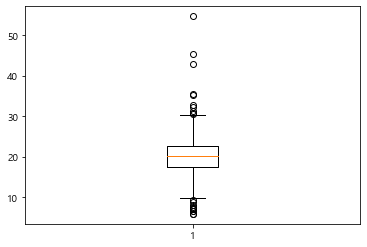%0A)

In \[36\]:

    g = plt.boxplot(df['19 A0 비율(%)'])

![](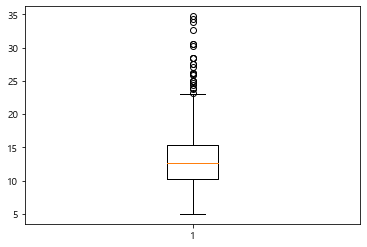%0A)

In \[37\]:

    g = plt.boxplot(df['19 A- 비율(%)'])

![](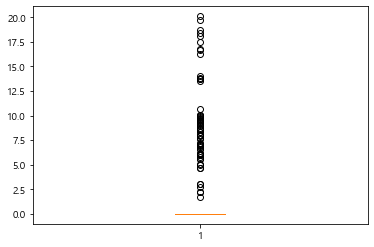%0A)

In \[38\]:

    g = plt.boxplot(df['20 A+ 비율(%)'])

![](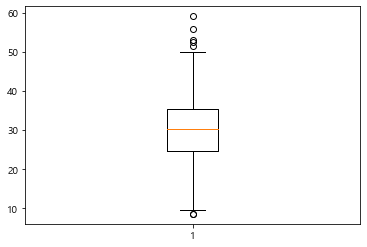%0A)

In \[39\]:

    g = plt.boxplot(df['20 A0 비율(%)'])

![](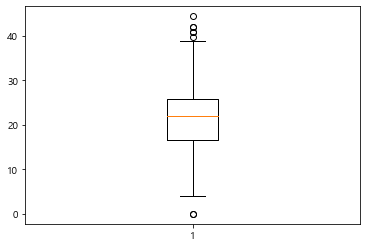%0A)

In \[40\]:

    g = plt.boxplot(df['20 A- 비율(%)'])

![](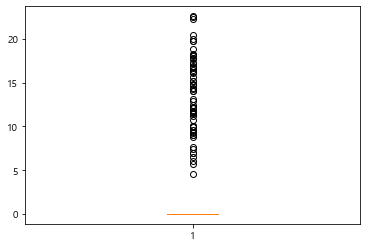%0A)

**확인/조치 내용 : 연속형은 이상치가 없는 것으로 보입니다**

In \[41\]:

    df['설립구분'].value_counts()

Out\[41\]:

    사립       385
    국립        86
    특별법법인      8
    국립대법인      4
    특별법국립      4
    공립         2
    Name: 설립구분, dtype: int64

In \[42\]:

    df['지역'].value_counts()

Out\[42\]:

    서울    114
    경기     72
    경북     38
    충남     36
    부산     32
    대전     28
    충북     26
    광주     24
    강원     22
    전남     22
    전북     21
    경남     20
    인천     12
    대구      8
    세종      6
    제주      4
    울산      4
    Name: 지역, dtype: int64

In \[43\]:

    df['상태'].value_counts()

Out\[43\]:

    기존    487
    폐교      2
    Name: 상태, dtype: int64

In \[44\]:

    df['학기'].value_counts()

Out\[44\]:

    1학기    242
    2학기    241
    3학기      3
    4학기      3
    Name: 학기, dtype: int64

3학기, 4학기? 생소합니다  
한 번 살펴봐야겠습니다

In \[45\]:

    df[(df['학기']=='3학기') | (df['학기']=='4학기')]

Out\[45\]:

|     | 학교종류 | 설립구분 | 지역 | 상태 | 학교명             | 학기  | 19 전공과목 성적인정 총학생수 | 만점평점 | 19 A+ 학생수 | 19 A+ 비율(%) | ... | 19 A- 학생수 | 19 A- 비율(%) | 학교명_학기              | 20 전공과목 성적인정 총학생수 | 20 A+ 학생수 | 20 A+ 비율(%) | 20 A0 학생수 | 20 A0 비율(%) | 20 A- 학생수 | 20 A- 비율(%) |
|-----|----------|----------|------|------|--------------------|-------|-------------------------------|----------|--------------|---------------|-----|--------------|---------------|--------------------------|-------------------------------|--------------|---------------|--------------|---------------|--------------|---------------|
| 94  | 대학교   | 사립     | 광주 | 기존 | 광주여자대학교     | 3학기 | 12545                         | 4.5      | 1705         | 13.6          | ... | 640          | 5.1           | 광주여자대학교_3학기     | 12676                         | 2887         | 22.8          | 1480         | 11.7          | 825          | 6.5           |
| 95  | 대학교   | 사립     | 광주 | 기존 | 광주여자대학교     | 4학기 | 18                            | 4.5      | 3            | 16.7          | ... | 0            | 0.0           | 광주여자대학교_4학기     | 30                            | 14           | 46.7          | 0            | 0.0           | 3            | 10.0          |
| 214 | 대학교   | 국립     | 서울 | 기존 | 서울과학기술대학교 | 4학기 | 34                            | 4.5      | 2            | 5.9           | ... | 0            | 0.0           | 서울과학기술대학교_4학기 | 125                           | 32           | 25.6          | 25           | 20.0          | 0            | 0.0           |
| 215 | 대학교   | 국립     | 서울 | 기존 | 서울과학기술대학교 | 3학기 | 1243                          | 4.5      | 151          | 12.1          | ... | 0            | 0.0           | 서울과학기술대학교_3학기 | 2133                          | 537          | 25.2          | 454          | 21.3          | 0            | 0.0           |
| 320 | 대학교   | 사립     | 대전 | 기존 | 우송대학교         | 3학기 | 23234                         | 4.5      | 4554         | 19.6          | ... | 0            | 0.0           | 우송대학교_3학기         | 24242                         | 7595         | 31.3          | 3231         | 13.3          | 0            | 0.0           |
| 321 | 대학교   | 사립     | 대전 | 기존 | 우송대학교         | 4학기 | 3858                          | 4.5      | 871          | 22.6          | ... | 0            | 0.0           | 우송대학교_4학기         | 3287                          | 1171         | 35.6          | 379          | 11.5          | 0            | 0.0           |

6 rows × 22 columns

In \[46\]:

    index_check = df[(df['학기']=='3학기') | (df['학기']=='4학기')].index
    df = df.drop(index_check)

In \[47\]:

    df['학기'].value_counts()

Out\[47\]:

    1학기    242
    2학기    241
    Name: 학기, dtype: int64

1년 기준 3학기, 4학기까지 있다면 분기별로 학기를 세는 것으로
추정됩니다  
시기는 조금 다르겠지만 전체적인 비교는 1학기, 2학기를 대상으로 할
예정이므로  
해당 row 데이터들을 배제하고 진행하겠습니다

In \[48\]:

    df['만점평점'].value_counts()

Out\[48\]:

    4.5    441
    4.3     40
    4.0      2
    Name: 만점평점, dtype: int64

In \[49\]:

    df[df['만점평점']==4.0]

Out\[49\]:

|     | 학교종류 | 설립구분 | 지역 | 상태 | 학교명           | 학기  | 19 전공과목 성적인정 총학생수 | 만점평점 | 19 A+ 학생수 | 19 A+ 비율(%) | ... | 19 A- 학생수 | 19 A- 비율(%) | 학교명_학기            | 20 전공과목 성적인정 총학생수 | 20 A+ 학생수 | 20 A+ 비율(%) | 20 A0 학생수 | 20 A0 비율(%) | 20 A- 학생수 | 20 A- 비율(%) |
|-----|----------|----------|------|------|------------------|-------|-------------------------------|----------|--------------|---------------|-----|--------------|---------------|------------------------|-------------------------------|--------------|---------------|--------------|---------------|--------------|---------------|
| 14  | 대학교   | 사립     | 서울 | 기존 | 감리교신학대학교 | 2학기 | 2813                          | 4.0      | 308          | 10.9          | ... | 133          | 4.7           | 감리교신학대학교_2학기 | 2914                          | 924          | 31.7          | 747          | 25.6          | 293          | 10.1          |
| 15  | 대학교   | 사립     | 서울 | 기존 | 감리교신학대학교 | 1학기 | 2984                          | 4.0      | 280          | 9.4           | ... | 179          | 6.0           | 감리교신학대학교_1학기 | 2900                          | 571          | 19.7          | 655          | 22.6          | 425          | 14.7          |

2 rows × 22 columns

만점평점(만점학점)이 4.0인 학교가 있습니다  
이후 데이터 분석에서 만점평점이 4.5/4.3인 학교만 통계 낼 예정이므로,
영향을 줄 수 있기 때문에 제거하고 가겠습니다  

In \[50\]:

    index_check = df[df['만점평점']==4.0].index
    df = df.drop(index_check)

In \[51\]:

    df['만점평점'].value_counts()

Out\[51\]:

    4.5    441
    4.3     40
    Name: 만점평점, dtype: int64

**확인/조치 내용 : 이산형은 학기, 만점평점에 이상치를 발견하였고 조치
완료하였습니다**

## <span style="color:#28B463">중복 데이터 제거</span><a href="#중복-데이터-제거" class="anchor-link">¶</a>

In \[52\]:

    df.duplicated().sum()

Out\[52\]:

    0

**확인/조치 내용 : 중복 데이터가 없습니다**

------------------------------------------------------------------------

# <span style="color:#5DADE2">456. 데이터 탐색, 분석 그리고 시각화</span><a href="#456.-데이터-탐색,-분석-그리고-시각화"
class="anchor-link">¶</a>

### <span style="color:Coral">만점평점과 학기를 그룹으로 하여 각 년도별 A+ / A0 / A- 비율 평균을 보고 싶습니다</span><a
href="#만점평점과-학기를-그룹으로-하여-각-년도별-A+-/-A0-/-A--비율-평균을-보고-싶습니다"
class="anchor-link">¶</a>

In \[53\]:

    ## 1학기 2학기 비교
    df.groupby(['만점평점','학기'])[['19 A+ 비율(%)', '19 A0 비율(%)', '19 A- 비율(%)', '20 A+ 비율(%)', '20 A0 비율(%)', '20 A- 비율(%)']].mean()

Out\[53\]:

|          |       | 19 A+ 비율(%) | 19 A0 비율(%) | 19 A- 비율(%) | 20 A+ 비율(%) | 20 A0 비율(%) | 20 A- 비율(%) |
|----------|-------|---------------|---------------|---------------|---------------|---------------|---------------|
| 만점평점 | 학기  |               |               |               |               |               |               |
| 4.3      | 1학기 | 18.010000     | 14.325000     | 10.310000     | 25.820000     | 20.925000     | 14.680000     |
|          | 2학기 | 18.305000     | 14.700000     | 10.475000     | 23.980000     | 18.920000     | 12.945000     |
| 4.5      | 1학기 | 19.754299     | 13.370136     | 0.389140      | 31.969683     | 23.199095     | 0.766063      |
|          | 2학기 | 20.893636     | 13.590000     | 0.371364      | 29.442727     | 19.714545     | 0.667273      |

#### <span style="color:palevioletRed">분석 결과</span><a href="#분석-결과" class="anchor-link">¶</a>

전체적으로 **19년도 → 20년도 A 비율의 전체적인 증가(성적 증가)가 확인
가능**합니다  
**1학기 → 2학기의 전체적인 A 비율의 증가(성적 증가)는 확답을 내릴 수
없는 상태입니다**  

### <span style="color:Coral">위 결과 내, 예상과 다르게 4.5 만점의 A- 비율이 0가 아닌 것을 확인 해봐야겠습니다</span><a
href="#위-결과-내,-예상과-다르게-4.5-만점의-A--비율이-0가-아닌-것을-확인-해봐야겠습니다"
class="anchor-link">¶</a>

In \[53\]:

    df[(df['만점평점']==4.5)&(df['19 A- 비율(%)']>0) & (df['학기']=='1학기')][['학교명', '19 A- 비율(%)', '20 A- 비율(%)']]

Out\[53\]:

|     | 학교명               | 19 A- 비율(%) | 20 A- 비율(%) |
|-----|----------------------|---------------|---------------|
| 88  | 광주교육대학교       | 7.1           | 16.2          |
| 92  | 광주여자대학교       | 5.0           | 7.0           |
| 142 | 대전신학대학교       | 7.2           | 17.8          |
| 231 | 서울신학대학교       | 6.2           | 12.4          |
| 248 | 성신여자대학교       | 3.0           | 9.9           |
| 272 | 숭실대학교           | 8.3           | 17.3          |
| 284 | 아세아연합신학대학교 | 9.2           | 17.8          |
| 300 | 영남신학대학교       | 7.0           | 14.1          |
| 418 | 한국교원대학교       | 2.2           | 11.7          |
| 440 | 한국침례신학대학교   | 9.3           | 9.0           |
| 446 | 한남대학교           | 7.7           | 15.7          |
| 472 | 한일장신대학교       | 13.8          | 20.4          |

#### <span style="color:palevioletRed">분석 결과</span><a href="#분석-결과" class="anchor-link">¶</a>

단순히 1개의 대학이면 이상치로 치부하고 제거하려고 했는데  
여러 개의 대학이 존재하는 것으로 보아, **일반적인 만점평점 4.5 대학과
다른 학점 시스템을 도입하고 있는 것으로 판단됩니다**  
이상치가 아닌 정상적인 데이터임을 확인하였으므로 넘어갑니다

국내 학교의 종류/설립구분별 통계가 보고 싶어졌습니다

In \[54\]:

    df_new = df.groupby(df['학교종류'])['설립구분']

In \[55\]:

    df_new.value_counts()

Out\[55\]:

    학교종류       설립구분 
    각종학교(대학)   사립         2
               특별법국립      2
    교육대학       국립        22
    기술대학       사립         2
    대학교        사립       338
               국립        60
               특별법법인      8
               국립대법인      4
               공립         2
               특별법국립      2
    방송통신대학     국립         2
    사이버대학(대학)  사립        34
    산업대학       사립         3
    Name: 설립구분, dtype: int64

In \[56\]:

    df_new.value_counts().sum()

Out\[56\]:

    481

#### <span style="color:palevioletRed">분석 결과</span><a href="#분석-결과" class="anchor-link">¶</a>

위에서 제거하였던 1개의 대학교(감리교신학대학교, 만점평점:4.0)를
제외하였을 때  
**전체 481개의 국내 일반 대학교 중에서 사립 대학교가 338개에
해당합니다**  
많은 대학교, 그 중에서 또 많은 사립 대학교가 있다는 생각이 듭니다  

교대는 국내 22 개의 대학교가 있으며 모두 국립입니다  
**또한 특별법국립/특별법법인/공립대법인 등 특수한 목적이나 배경으로
설립된 대학교가 있음을 확인할 수 있었습니다**

국내 수도권 대학교의 종류/설립구분별 통계가 보고 싶어졌습니다

In \[57\]:

    df_수도권 = df[(df['지역']=='서울')|(df['지역']=='경기')|(df['지역']=='인천')]

In \[58\]:

    df_수도권.groupby(['지역','설립구분'])[['19 전공과목 성적인정 총학생수', '20 전공과목 성적인정 총학생수']].mean()

Out\[58\]:

|      |            | 19 전공과목 성적인정 총학생수 | 20 전공과목 성적인정 총학생수 |
|------|------------|-------------------------------|-------------------------------|
| 지역 | 설립구분   |                               |                               |
| 경기 | 국립       | 11288.750000                  | 11081.000000                  |
|      | 사립       | 16023.264706                  | 16507.426471                  |
| 서울 | 공립       | 26556.000000                  | 27571.000000                  |
|      | 국립       | 114194.875000                 | 113915.250000                 |
|      | 국립대법인 | 42611.500000                  | 43688.000000                  |
|      | 사립       | 28536.395833                  | 29966.156250                  |
|      | 특별법국립 | 11750.000000                  | 11845.000000                  |
| 인천 | 국립       | 5546.000000                   | 5383.000000                   |
|      | 국립대법인 | 40246.000000                  | 40353.000000                  |
|      | 사립       | 11643.500000                  | 11562.625000                  |

#### <span style="color:palevioletRed">분석 결과</span><a href="#분석-결과" class="anchor-link">¶</a>

(성적인정 총학생수는 실질적인 학생 수로 전환하여 해석하였습니다)  
**저출산 시대에 지속적이 인구 감소로 인해 장기적을 봤을 때 많은 대학교
수의 감소가 예측될 것이라는 소식을 들었습니다**  
위에서 이상치 탐색 때 살펴봤던 것처럼 이른바 부실 대학은 '폐교'의 기로에
놓이기 십상입니다만,  
**19 → 20년도의 실질적인 학생 수 평균을 비교해 보았을 때는 눈에 띄는
감소 수치가 확인되지 않습니다  
학교의 재정사항 또한 고려해야할 문제겠지만 학생 수만을 놓고 봤을 때는
수도권 대학은 당분간 큰 문제는 없을 것으로 보입니다**  

국내 비수도권 대학교의 종류/설립구분별 통계가 보고 싶어졌습니다

In \[59\]:

    index_check = df[(df['지역']=='서울')|(df['지역']=='경기')|(df['지역']=='인천')].index
    df_비수도권 = df.drop(index_check)

In \[60\]:

    df_비수도권.groupby(['지역','설립구분'])[['19 전공과목 성적인정 총학생수', '20 전공과목 성적인정 총학생수']].mean().sort_values('19 전공과목 성적인정 총학생수',ascending=False)

Out\[60\]:

|      |            | 19 전공과목 성적인정 총학생수 | 20 전공과목 성적인정 총학생수 |
|------|------------|-------------------------------|-------------------------------|
| 지역 | 설립구분   |                               |                               |
| 대구 | 사립       | 72416.000000                  | 72904.000000                  |
| 대전 | 국립       | 47930.500000                  | 48729.000000                  |
| 부산 | 국립       | 43394.750000                  | 43745.000000                  |
| 대구 | 국립       | 42932.750000                  | 42894.500000                  |
| 울산 | 사립       | 41473.000000                  | 41052.500000                  |
| 제주 | 국립       | 34592.500000                  | 34940.000000                  |
| 광주 | 국립       | 30332.250000                  | 31533.500000                  |
| 전북 | 국립       | 29354.166667                  | 30383.666667                  |
| 경남 | 국립       | 27581.125000                  | 26796.125000                  |
| 부산 | 사립       | 27084.000000                  | 27255.791667                  |
| 충남 | 국립       | 25476.750000                  | 25410.250000                  |
|      | 사립       | 24620.433333                  | 25342.300000                  |
| 충북 | 국립       | 24381.500000                  | 23883.625000                  |
| 강원 | 사립       | 22679.666667                  | 23463.750000                  |
| 전북 | 사립       | 21935.733333                  | 22834.466667                  |
| 강원 | 국립       | 20755.200000                  | 20711.800000                  |
| 경북 | 사립       | 20340.500000                  | 20189.382353                  |
|      | 국립       | 19352.750000                  | 18561.750000                  |
| 광주 | 사립       | 18580.812500                  | 18942.750000                  |
| 대전 | 사립       | 17646.850000                  | 17726.250000                  |
| 경남 | 사립       | 17627.916667                  | 17795.083333                  |
| 충북 | 사립       | 16881.388889                  | 17731.000000                  |
| 전남 | 국립       | 16722.500000                  | 17289.250000                  |
| 대전 | 특별법법인 | 14400.000000                  | 9883.000000                   |
| 울산 | 특별법법인 | 10963.500000                  | 8308.000000                   |
| 세종 | 사립       | 10876.166667                  | 10775.333333                  |
| 전남 | 사립       | 8215.785714                   | 8313.571429                   |
| 제주 | 사립       | 4683.500000                   | 3872.500000                   |
| 대구 | 특별법법인 | 3363.500000                   | 3707.500000                   |
| 충남 | 특별법국립 | 1878.000000                   | 1871.500000                   |
| 광주 | 특별법법인 | 1116.500000                   | 1256.500000                   |

#### <span style="color:palevioletRed">분석 결과</span><a href="#분석-결과" class="anchor-link">¶</a>

(성적인정 총학생수는 실질적인 학생 수로 전환하여 해석하였습니다)  
**비수도권도 실질적인 학생 수만 봐서는 큰 문제가 없어 보입니다**  
대구 사립이나 광주 국립이나 전북 국립 등은 오히려 학생 수가 증가하여서
해당 대학들은 걱정을 덜어도 될 것으로 보입니다  

아까 확인하였던 특별법법인/특별법국립/국립대법인의 대학교가 궁금합니다

In \[61\]:

    df[((df['설립구분']=='특별법법인')|(df['설립구분']=='특별법국립')|(df['설립구분']=='국립대법인')) & (df['학기']=='1학기')][['학교명','설립구분']]

Out\[61\]:

|     | 학교명             | 설립구분   |
|-----|--------------------|------------|
| 86  | 광주과학기술원     | 특별법법인 |
| 124 | 대구경북과학기술원 | 특별법법인 |
| 222 | 서울대학교         | 국립대법인 |
| 323 | 울산과학기술원     | 특별법법인 |
| 346 | 인천대학교         | 국립대법인 |
| 416 | 한국과학기술원     | 특별법법인 |
| 432 | 한국예술종합학교   | 특별법국립 |
| 436 | 한국전통문화대학교 | 특별법국립 |

#### <span style="color:palevioletRed">분석 결과</span><a href="#분석-결과" class="anchor-link">¶</a>

특별법법인 대학으로는 광주/대구경북/울산 과기원등이 해당하였습니다  
특별법국립 대학으로는 한예종(한국예술종합합교), 한국전통문화대학교가
해당하였습니다  
국립대법인 대학으로는 서울대학교, 인천대학교가 해당하였습니다  
**특별법법인/특별법국립 대학은 확실히 특수한 목적을 가지고 설립된
학교들임을 알 수 있습니다**  

보다 명료한 19 → 20 A 비율의 변동 통계가 보고 싶어졌습니다

In \[62\]:

    df.head(0)

Out\[62\]:

|     | 학교종류 | 설립구분 | 지역 | 상태 | 학교명 | 학기 | 19 전공과목 성적인정 총학생수 | 만점평점 | 19 A+ 학생수 | 19 A+ 비율(%) | ... | 19 A- 학생수 | 19 A- 비율(%) | 학교명_학기 | 20 전공과목 성적인정 총학생수 | 20 A+ 학생수 | 20 A+ 비율(%) | 20 A0 학생수 | 20 A0 비율(%) | 20 A- 학생수 | 20 A- 비율(%) |
|-----|----------|----------|------|------|--------|------|-------------------------------|----------|--------------|---------------|-----|--------------|---------------|-------------|-------------------------------|--------------|---------------|--------------|---------------|--------------|---------------|

0 rows × 22 columns

이를 위해 참고할 column 명들을 확인하고 새로운 파생변수 column을
만들어줍니다

In \[63\]:

    df['19 A 비율'] = df['19 A+ 비율(%)'] + df['19 A0 비율(%)'] + df['19 A- 비율(%)'].astype(float)
    df['20 A 비율'] = df['20 A+ 비율(%)'] + df['20 A0 비율(%)'] + df['20 A- 비율(%)'].astype(float)
    df['20-19 A 비율'] = df['20 A 비율'] - df['19 A 비율'].astype(float)

In \[64\]:

    df[df['학교명']=='가천대학교'][['학기','19 A 비율', '20 A 비율', '20-19 A 비율']]

Out\[64\]:

|     | 학기  | 19 A 비율 | 20 A 비율 | 20-19 A 비율 |
|-----|-------|-----------|-----------|--------------|
| 2   | 1학기 | 34.7      | 66.1      | 31.4         |
| 3   | 2학기 | 41.8      | 66.3      | 24.5         |

#### <span style="color:palevioletRed">분석 결과</span><a href="#분석-결과" class="anchor-link">¶</a>

가천대학교의 19 → 20 A 비율을 놓고 봤을 때  
1학기 기준으로는 31.4%의 차이가, 2학기 기준으로는 24.5%의 차이가 있음을
확인하였습니다  
**코로나로 인한 A비율의 변동이 가져온 실질적인 결과 차이를 확인할 수
있었습니다**

In \[65\]:

    df_Agap_top = df.groupby(df['학교명'])[['19 A 비율','20 A 비율','20-19 A 비율']].mean().sort_values('20-19 A 비율',ascending=False).head(10)
    df_Agap_top

Out\[65\]:

|                              | 19 A 비율 | 20 A 비율 | 20-19 A 비율 |
|------------------------------|-----------|-----------|--------------|
| 학교명                       |           |           |              |
| 한국교원대학교               | 25.25     | 78.65     | 53.40        |
| 춘천교육대학교               | 23.00     | 71.45     | 48.45        |
| 경기대학교                   | 32.10     | 78.90     | 46.80        |
| 서울여자대학교               | 29.45     | 74.40     | 44.95        |
| 경기대학교 \_제2캠퍼스       | 31.45     | 75.65     | 44.20        |
| 덕성여자대학교               | 30.90     | 73.40     | 42.50        |
| 단국대학교                   | 29.80     | 71.40     | 41.60        |
| 성신여자대학교               | 31.60     | 72.85     | 41.25        |
| 인천가톨릭대학교 \_제2캠퍼스 | 31.00     | 71.85     | 40.85        |
| 동국대학교                   | 30.85     | 71.35     | 40.50        |

#### <span style="color:palevioletRed">분석 결과</span><a href="#분석-결과" class="anchor-link">¶</a>

**변동 상위 10개의 대학**은 위와 같습니다  
**약 30%의 비율에서 70% 이상의 비율로 상승한 것이 관측 가능합니다**  

여담이지만 한국교원대학교나 춘천교육대학교의 경우,  
교원 선발을 한다고 하면 A비율의 증가로 인해 학점에 따른 선발 경쟁력이
떨어질 수 있는데  
가르치는 능력 내지는 실무나 면접 등으로 최종 선발 여부가 갈리겠다는
판단이 듭니다

In \[66\]:

    df_Agap_low = df.groupby(df['학교명'])[['19 A 비율','20 A 비율','20-19 A 비율']].mean().sort_values('20-19 A 비율',ascending=True).head(10)
    df_Agap_low

Out\[66\]:

|                          | 19 A 비율 | 20 A 비율 | 20-19 A 비율  |
|--------------------------|-----------|-----------|---------------|
| 학교명                   |           |           |               |
| 화신사이버대학교         | 37.05     | 34.65     | -2.400000e+00 |
| 중앙승가대학교           | 77.35     | 76.10     | -1.250000e+00 |
| 한국열린사이버대학교     | 34.45     | 33.60     | -8.500000e-01 |
| 가톨릭대학교 \_제3캠퍼스 | 24.65     | 24.00     | -6.500000e-01 |
| 대구경북과학기술원       | 50.15     | 49.70     | -4.500000e-01 |
| 부산디지털대학교         | 30.40     | 30.10     | -3.000000e-01 |
| 한양사이버대학교         | 36.60     | 36.50     | -1.000000e-01 |
| 숭실사이버대학교         | 35.45     | 35.40     | -5.000000e-02 |
| 건양대학교               | 27.15     | 27.10     | -5.000000e-02 |
| 원광디지털대학교         | 30.10     | 30.10     | -1.776357e-15 |

#### <span style="color:palevioletRed">분석 결과</span><a href="#분석-결과" class="anchor-link">¶</a>

**변동 하위 10개의 대학**은 위와 같습니다  
**상승은 커녕 비율이 하락하였습니다**  
애초부터 준수한 percentage를 보이는 중앙승가대학교나
대구경북과학기술원을 제외하고는  
학점을 위해서 부단한 노력이 필요할 것으로 보입니다  

### <span style="color:Coral"> 19 → 20 A 비율과 1학기/2학기의 성적 차이를 직접 검정해 보고 싶습니다</span><a
href="#-19-→-20-A-비율과-1학기/2학기의-성적-차이를-직접-검정해-보고-싶습니다"
class="anchor-link">¶</a>

In \[67\]:

    value_19_1학기_A비율_평균 = df[df['학기']=='1학기']['19 A 비율'].mean()
    value_20_1학기_A비율_평균 = df[df['학기']=='1학기']['20 A 비율'].mean()

In \[68\]:

    value_19_1학기_A비율_평균, value_20_1학기_A비율_평균

Out\[68\]:

    (34.27136929460581, 56.390456431535284)

필요한 평균값을 구하고 t검정 통계량을 계산합니다

In \[69\]:

    tTestResult = stats.ttest_1samp(df[df['학기']=='2학기']['19 A 비율'], value_19_1학기_A비율_평균)

In \[70\]:

    print('t검정 통계량 = %.3f, pvalue = %.3f'%(tTestResult))

    t검정 통계량 = 2.421, pvalue = 0.016

#### <span style="color:palevioletRed">분석 결과</span><a href="#분석-결과" class="anchor-link">¶</a>

귀무가설 : 19년도 1학기와 2학기의 A비율 차이는 없다  
대립가설 : 19년도 1학기와 2학기의 A비율 차이는 있다  
이 때 p-value가 0.05 이하이므로 대립가설을 채택,  
즉, **2019년도의 경우, 1학기와 2학기의 A 비율의 차이가 있습니다**  

In \[71\]:

    tTestResult = stats.ttest_1samp(df[df['학기']=='2학기']['20 A 비율'], value_20_1학기_A비율_평균)

In \[72\]:

    print('t검정 통계량 = %.3f, pvalue = %.9f'%(tTestResult))

    t검정 통계량 = -7.435, pvalue = 0.000000000

#### <span style="color:palevioletRed">분석 결과</span><a href="#분석-결과" class="anchor-link">¶</a>

귀무가설 : 20년도 1학기와 2학기의 A비율 차이는 없다  
대립가설 : 20년도 1학기와 2학기의 A비율 차이는 있다  
이 때 p-value가 0.05 이하이므로 대립가설을 채택,  
즉, **2020년도도 2019년처럼 A비율의 차이가 있습니다**  

In \[73\]:

    value_19_전체_A비율_평균 = df['19 A 비율'].mean()
    value_19_전체_A비율_평균

Out\[73\]:

    34.921205821205845

In \[74\]:

    tTestResult = stats.ttest_1samp(df['20 A 비율'], value_19_전체_A비율_평균)
    print('t검정 통계량 = %.3f, pvalue = %.9f'%(tTestResult))

    t검정 통계량 = 31.211, pvalue = 0.000000000

#### <span style="color:palevioletRed">분석 결과</span><a href="#분석-결과" class="anchor-link">¶</a>

귀무가설 : 20년도와 19년도의 A비율 차이는 없다  
대립가설 : 20년도와 19년도의 A비율 차이는 있다  
이 때 p-value가 0.05 이하이므로 대립가설을 채택,  
즉, **2020년도와 2019년도에 마찬가지로 A비율의 차이가 있습니다**  

### <span style="color:Coral">19 → 20 A 비율의 변동에 대한 시각화를 가천대학교를 포함해서 그려보고 싶습니다</span><a
href="#19-→-20-A-비율의-변동에-대한-시각화를-가천대학교를-포함해서-그려보고-싶습니다"
class="anchor-link">¶</a>

In \[75\]:

    df_gachon = df[df['학교명'] =='가천대학교']
    df_gachon = df_gachon.groupby(df_gachon['학교명'])[['19 A 비율', '20 A 비율', '20-19 A 비율']].mean()
    df_gachon

Out\[75\]:

|            | 19 A 비율 | 20 A 비율 | 20-19 A 비율 |
|------------|-----------|-----------|--------------|
| 학교명     |           |           |              |
| 가천대학교 | 38.25     | 66.2      | 27.95        |

In \[76\]:

    df_Agap = pd.concat([df_Agap_top.head(5), df_Agap_low.head(5), df_gachon],axis=0)
    df_Agap

Out\[76\]:

|                          | 19 A 비율 | 20 A 비율 | 20-19 A 비율 |
|--------------------------|-----------|-----------|--------------|
| 학교명                   |           |           |              |
| 한국교원대학교           | 25.25     | 78.65     | 53.40        |
| 춘천교육대학교           | 23.00     | 71.45     | 48.45        |
| 경기대학교               | 32.10     | 78.90     | 46.80        |
| 서울여자대학교           | 29.45     | 74.40     | 44.95        |
| 경기대학교 \_제2캠퍼스   | 31.45     | 75.65     | 44.20        |
| 화신사이버대학교         | 37.05     | 34.65     | -2.40        |
| 중앙승가대학교           | 77.35     | 76.10     | -1.25        |
| 한국열린사이버대학교     | 34.45     | 33.60     | -0.85        |
| 가톨릭대학교 \_제3캠퍼스 | 24.65     | 24.00     | -0.65        |
| 대구경북과학기술원       | 50.15     | 49.70     | -0.45        |
| 가천대학교               | 38.25     | 66.20     | 27.95        |

직관적인 비교를 위해 19 → 20 A비율 상위 5개의 대학과, 가천대학교, 그리고
하위 5개의 대학을 병합하여 데이터 프레임을 구축합니다

In \[77\]:

    # seaborn plot 설정

    sns.set_style("whitegrid") # 격자
    plt.rc('font', family='Malgun Gothic') # whitegrid 설정 시 한글 폰트가 깨지므로 다시 설정
    sns.set_context("notebook",rc={"grid.linewidth": 0.5}) # 크기 : paper, notebook, talk, poster

In \[78\]:

    df_Agap.sort_values('20-19 A 비율',ascending=True).plot.barh(title="상위 5개의 학교와 가천대, 하위 5개 대학의 20-19 A비율")

Out\[78\]:

    <AxesSubplot:title={'center':'상위 5개의 학교와 가천대, 하위 5개 대학의 20-19 A비율'}, ylabel='학교명'>

![](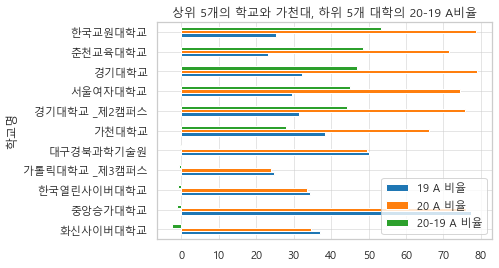%0A)

#### <span style="color:palevioletRed">분석 결과</span><a href="#분석-결과" class="anchor-link">¶</a>

**가천대학교의 19 → 20 A 비율은** 상위 5개의 대학보다는 낮지만 **나름
준수한 percentage**라고 판단됩니다

### <span style="color:Coral">수도권 대학의 지역 및 설립구분 별로 20년도 A비율을 시각화해서 보고 싶습니다</span><a
href="#수도권-대학의-지역-및-설립구분-별로-20년도-A비율을-시각화해서-보고-싶습니다"
class="anchor-link">¶</a>

In \[79\]:

    # SettingWithCopyWarning 복사 경고문으로 인한 setting
    # 무시
    pd.set_option('mode.chained_assignment',  None)

In \[80\]:

    df_수도권['20 A 비율'] = df_수도권['20 A+ 비율(%)'] + df_수도권['20 A0 비율(%)'] + df_수도권['20 A- 비율(%)']
    df_수도권

Out\[80\]:

|     | 학교종류         | 설립구분 | 지역 | 상태 | 학교명                   | 학기  | 19 전공과목 성적인정 총학생수 | 만점평점 | 19 A+ 학생수 | 19 A+ 비율(%) | ... | 19 A- 비율(%) | 학교명_학기                    | 20 전공과목 성적인정 총학생수 | 20 A+ 학생수 | 20 A+ 비율(%) | 20 A0 학생수 | 20 A0 비율(%) | 20 A- 학생수 | 20 A- 비율(%) | 20 A 비율 |
|-----|------------------|----------|------|------|--------------------------|-------|-------------------------------|----------|--------------|---------------|-----|---------------|--------------------------------|-------------------------------|--------------|---------------|--------------|---------------|--------------|---------------|-----------|
| 2   | 대학교           | 사립     | 경기 | 기존 | 가천대학교               | 1학기 | 65017                         | 4.5      | 13816        | 21.2          | ... | 0.0           | 가천대학교_1학기               | 64951                         | 22783        | 35.1          | 20130        | 31.0          | 0            | 0.0           | 66.1      |
| 3   | 대학교           | 사립     | 경기 | 기존 | 가천대학교               | 2학기 | 60248                         | 4.5      | 15066        | 25.0          | ... | 0.0           | 가천대학교_2학기               | 62291                         | 20750        | 33.3          | 20554        | 33.0          | 0            | 0.0           | 66.3      |
| 8   | 대학교           | 사립     | 경기 | 기존 | 가톨릭대학교             | 1학기 | 22736                         | 4.5      | 5332         | 23.5          | ... | 0.0           | 가톨릭대학교_1학기             | 22882                         | 9249         | 40.4          | 5563         | 24.3          | 0            | 0.0           | 64.7      |
| 9   | 대학교           | 사립     | 경기 | 기존 | 가톨릭대학교             | 2학기 | 20798                         | 4.5      | 5204         | 25.0          | ... | 0.0           | 가톨릭대학교_2학기             | 21828                         | 7698         | 35.3          | 3167         | 14.5          | 0            | 0.0           | 49.8      |
| 10  | 대학교           | 사립     | 서울 | 기존 | 가톨릭대학교 \_제2캠퍼스 | 1학기 | 6792                          | 4.5      | 1235         | 18.2          | ... | 0.0           | 가톨릭대학교 \_제2캠퍼스_1학기 | 8527                          | 2137         | 25.1          | 2801         | 32.8          | 0            | 0.0           | 57.9      |
| ... | ...              | ...      | ...  | ...  | ...                      | ...   | ...                           | ...      | ...          | ...           | ... | ...           | ...                            | ...                           | ...          | ...           | ...          | ...           | ...          | ...           | ...       |
| 471 | 사이버대학(대학) | 사립     | 서울 | 기존 | 한양사이버대학교         | 2학기 | 45413                         | 4.5      | 7991         | 17.6          | ... | 0.0           | 한양사이버대학교_2학기         | 49470                         | 8434         | 17.0          | 9483         | 19.2          | 0            | 0.0           | 36.2      |
| 474 | 대학교           | 사립     | 경기 | 기존 | 협성대학교               | 2학기 | 13261                         | 4.5      | 2534         | 19.1          | ... | 0.0           | 협성대학교_2학기               | 13287                         | 3992         | 30.0          | 2992         | 22.5          | 0            | 0.0           | 52.5      |
| 475 | 대학교           | 사립     | 경기 | 기존 | 협성대학교               | 1학기 | 14626                         | 4.5      | 2624         | 17.9          | ... | 0.0           | 협성대학교_1학기               | 14539                         | 5371         | 36.9          | 4104         | 28.2          | 0            | 0.0           | 65.1      |
| 483 | 대학교           | 사립     | 서울 | 기존 | 홍익대학교               | 1학기 | 32581                         | 4.5      | 6089         | 18.7          | ... | 0.0           | 홍익대학교_1학기               | 26068                         | 7737         | 29.7          | 5542         | 21.3          | 0            | 0.0           | 51.0      |
| 484 | 대학교           | 사립     | 서울 | 기존 | 홍익대학교               | 2학기 | 29731                         | 4.5      | 5664         | 19.1          | ... | 0.0           | 홍익대학교_2학기               | 30557                         | 7491         | 24.5          | 5209         | 17.0          | 0            | 0.0           | 41.5      |

194 rows × 23 columns

In \[81\]:

    # 경고문 재설정
    pd.set_option('mode.chained_assignment', 'warn')

In \[82\]:

    sns.set_context("notebook")
    plt.title("수도권 내 지역 및 설립구분 별 20년도 A 비율 평균")
    sns.barplot(x="20 A 비율", y="지역", hue="설립구분", data=df_수도권)

Out\[82\]:

    <AxesSubplot:title={'center':'수도권 내 지역 및 설립구분 별 20년도 A 비율 평균'}, xlabel='20 A 비율', ylabel='지역'>

![](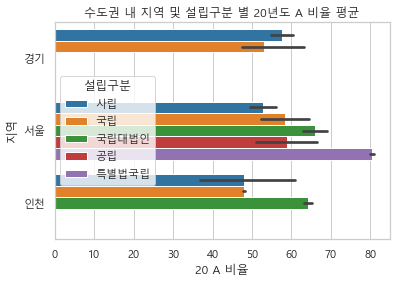%0A)

#### <span style="color:palevioletRed">분석 결과</span><a href="#분석-결과" class="anchor-link">¶</a>

특별법국립 대학(한예종(한국예술종합합교), 한국전통문화대학교)의 비율이
80%에 육박함을 확인 가능합니다  
**서울/인천은 국립대학교에 비해 사립 대학의 A 비율이 낮거나 비슷한데
경기 지역은 약간 더 높습니다**  
**전체적인 A 비율은 50\~60%에 이르는 것을 확인 가능합니다**  

### <span style="color:Coral">수도권 대학의 지역 및 설립구분 별로 성적인정 총학생수(실질적인 학생수)를 시각화해서 보고 싶습니다</span><a
href="#수도권-대학의-지역-및-설립구분-별로-성적인정-총학생수(실질적인-학생수)를-시각화해서-보고-싶습니다"
class="anchor-link">¶</a>

In \[83\]:

    # 시각화를 해보고 결과를 봤는데 결과가 조금 이상해서 이상치가 있나 확인을 해보았습니다
    df[(df['지역']=='서울') &(df['설립구분']=='국립')].groupby('학교명')['20 전공과목 성적인정 총학생수'].mean().sort_values(ascending=False)

Out\[83\]:

    학교명
    한국방송통신대학교    402653.0
    서울과학기술대학교     33257.5
    한국체육대학교       11792.0
    서울교육대학교        7958.5
    Name: 20 전공과목 성적인정 총학생수, dtype: float64

#### <span style="color:palevioletRed">분석 결과</span><a href="#분석-결과" class="anchor-link">¶</a>

서울 내 국립 대학교에 대해서 sort로 확인을 해보았습니다  
한국방송통신대학교에는 40만명에 육박하는 정말 많은 학생들이 있습니다  
아까까지는 이상치로 간주하지 않았지만,  
**수도권 대학의 지역 및 설립구분 별 학생 수를 통계 내기에는 결과가
치우쳐지기에 배제하고 가도록 하겠습니다**  

In \[84\]:

    index_check = df_수도권[(df_수도권['학교명']=='한국방송통신대학교')].index
    df_수도권_insert = df_수도권.drop(index_check)
    plt.title("수도권 내 지역 및 설립구분 별 20년도 성적인정 총학생수")
    g = sns.barplot(x="20 전공과목 성적인정 총학생수", y="지역", hue="설립구분", data=df_수도권_insert)

![](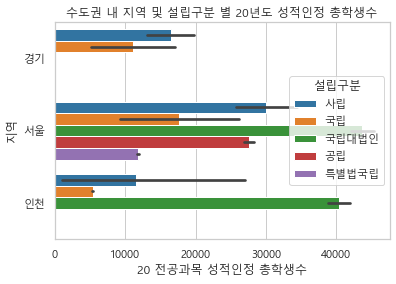%0A)

In \[85\]:

    df[df['지역']=='경기'].groupby('학교명')['20 전공과목 성적인정 총학생수'].mean().sort_values(ascending=False).head(5)

Out\[85\]:

    학교명
    가천대학교               63621.0
    단국대학교               41893.5
    경기대학교               36914.5
    한양대학교(ERICA) _분교    34062.0
    아주대학교               32680.0
    Name: 20 전공과목 성적인정 총학생수, dtype: float64

추가 분석을 위한 것으로, 경기 지역 내 20년도 전공과목 성적인정 총학생
수(1,2학기 평균)의 많은 순으로 5개의 대학입니다

#### <span style="color:palevioletRed">분석 결과</span><a href="#분석-결과" class="anchor-link">¶</a>

(약 40만명의 학생 수를 보유한 한국방송통신대학교를 배제한 결과입니다)  
  
**수도권에서 가장 많은 학생들이 있는 대학교에 대해서, 서울은 국립대법인
대학(서울대학교)였고, 인천은 인천대학교였습니다**  
국립대법인 대학을 제외한 일반적인 국립대학은 지역별로, 사립대학보다
평균적으로 학생 수가 적었습니다  
특별법국립 대학은 서울에만 위치함을 확인하였고 학교마다 평균적으로 약 만
명의 학생이 있음을 확인할 수 있습니다  
**또한 경기 지역 대학교의 학생 수 평균치를 놓고 봤을 때, 가천대학교에
학생 수가 정말 많다는 것 또한 알게 되었습니다**  

------------------------------------------------------------------------

# <span style="color:purple">7. 차별화 분석 point</span><a href="#7.-차별화-분석-point" class="anchor-link">¶</a>

-   <span style="color:#F7347A">Excel 데이터를 CSV 파일로 바꾸어서 Load
    후 전처리</span>하였습니다
-   <span style="color:#F7347A">전처리를 python 코드로만 모두
    수행</span>하였습니다
-   data frame 내 숫자에 대해서 12,588와 같이 <span
    style="color:#F7347A">','가 포함되어 있는 데이터를 정규표현식을
    활용하여 제거하였습니다</span>
-   2020 csv를 기반으로 <span style="color:#F7347A">같은 data frame
    양식이면 적용될 수 있는 함수를 만들었고 2021 csv에 적용, 결과는
    성공적이었습니다</span>
-   <span style="color:#F7347A">필요한 데이터셋을 만들기 위해서</span>
    2020 데이터셋과 <span style="color:#F7347A">나누고 merge</span>
    했으며, 이를 2021 데이터와 추가적으로 merge 했습니다
-   필요에 따라 데이터 프레임 내 column 명들을 바꾸었습니다

-   이상치 제거 등에서 <span style="color:#F7347A">필요 없는 row
    데이터를 제거하기 위해 index 기능을 사용</span>하였습니다
-   19 A 비율, 20 A 비율 등의 <span style="color:#0057e7">파생 변수를
    활용</span>하였습니다
-   수도권과 비수도권 분석을 위해 data frame을 나눠서 사용하였습니다

-   시각화 시에 .setstyle("whitegrid")등 <span
    style="color:#0057e7">seaborn의 속성들을 활용</span>하였습니다
-   <span style="color:#0057e7">분석에서 얻은 정보를 토대로 이어지는
    분석에서 활용</span>하였습니다 (ex. 국립대법인 → 서울대학교 &
    인천대학교)

------------------------------------------------------------------------

# <span style="color:#0057e7">8. 빅데이터 수업을 마감하며</span><a href="#8.-빅데이터-수업을-마감하며" class="anchor-link">¶</a>

3월에 OT 와 첫 수업을 들으며 다스비다니아 \~ (러시아어 - '안녕하세요')를
외치던게 엊그제 같은데  
벌써 6월이 되고 종강을 할 때가 되었다는 게.. 시간이 정말 빨리 가는 것
같습니다  
  
교수님을 처음 뵈었던 건 교수님께서도 기억해주셨듯 지금으로부터 약 5년
전인 2016년 '소프트웨어 공학' 강의 때였습니다  
당시에는 나름 최선을 다하는 거였지만서도 스트레스를 많이 받아서였는지
생각만큼 잘 안 되고, 힘도 많이 들어서,  
소프트웨어 공학 때는 처음으로 (기말 고사를) 늦게 제출하고 C+를 맞았던
기억이 아직도 생생합니다  
그 때는 솔직히 스스로에 대한 분노와 허탈감으로 회의감이 많이 들었고
휴학하고 그러다가 군대 가고 그랬습니다  
  
전역한 이후에 다시 복학하고 든 생각은,  
교수님의 (소프트웨어 공학) 강의가 장기적으로 도움이 되었다는
점이었습니다  
그래서 이번에 4학년이 되면서 빅데이터 강의를 수강할 때 교수님과 이강윤
교수님 사이에서,  
이번엔 제대로 해보리라 마음 먹고 교수님의 강의를 수강하였습니다  
물론 교수님의 원활한 설명 덕인지 쉽게 이해가 되었고, 종합적으로 봤을 때
이번 학기 강의에 대한 후회는 일절 없었습니다  
  
끝으로, 교수님 부디 옥체 보존하시고 만수 무강하시길 기원합니다  
이상입니다 감사합니다  

------------------------------------------------------------------------

#### 참고 문헌<a href="#참고-문헌" class="anchor-link">¶</a>

-   python markdown
    -   <https://velog.io/@yuuuye/velog-%EB%A7%88%ED%81%AC%EB%8B%A4%EC%9A%B4MarkDown-%EC%9E%91%EC%84%B1%EB%B2%95>
    -   <https://a1010100z.tistory.com/8>

<!-- -->

-   python isalpha() method
    -   <https://www.geeksforgeeks.org/python-string-isalpha-application/>
    -   <https://appia.tistory.com/178>

<!-- -->

-   정규 표현식을 활용한 전처리
    -   <https://acdongpgm.tistory.com/166>
    -   <https://www.python2.net/questions-167116.htm>

<!-- -->

-   데이터 프레임 열 이름 바꾸기
    -   <https://mizykk.tistory.com/131>

<!-- -->

-   pandas 특정 행 삭제
    -   <https://blog.naver.com/PostView.nhn?blogId=rising_n_falling&logNo=221629326893>

<!-- -->

-   seaborn 스타일 사용자 정의
    -   <http://hleecaster.com/python-seaborn-set-style-and-context/>

<!-- -->

-   html color
    -   <https://htmlcolorcodes.com/>
    -   <https://www.color-hex.com/color-palettes/popular.php>

<!-- -->

-   pandas SettingWithCopy Warning or Error
    -   <https://blog.naver.com/PostView.nhn?blogId=wideeyed&logNo=221817400937>